# Relationship between Simulated Annealing and Data Cloning Part 1:

# Instructor: Brian Zaharatos

### Claim: 
If we perform the simulated annealing algorithm on negative log-likelihood function, it is the same to perform the data cloning algorithm on posterior distribution with a special uniform prior distribution, and some other conditions.



### Proof:

Data cloning uses Metropolis-Hastings algorithm, so first let's recall why this algorithm will give us samples from posterior distribution. The way that MH-algorihtm constructs the acceptance probability will make the posterior distribution satisfies the detailed-balance condition, since detailed balance condition is "stronger" than stationary distribution, so the posterior distribution is a stationary distribution for the markov chain we produced from MH-algorithm, which means if we run the MH-algorithm forever, in theory the markov chain will converge(see the remark1 bleow) to this stationary distribution.

**Remark1**: The markov chain produced by MH-algorithm, is a discrete time, continuous state space markov chain. In markov processes class I only studied the convergence theroem for discrete time, discrete state space markov chain and continuous time, discrete state space markov process, so I am not sure what are the conditions for a discrete time, continuous state space markov chain to converge, but I am sure it will work, I can look into this if this is important!


Now we will use the **same idea** ([Essentials of Stochastic Processes](https://services.math.duke.edu/~rtd/EOSP/EOSP2E.pdf) at page 36) to prove simulated annealing with constant temperature is the same as data cloning under some conditions, let's begin!


Denote the $r(x,y)$ as the acceptance probability (technically it is probability density function), ie: if the current state is x then r(x,y) is the probability that we will accpet the proposed state y as the next state.

Denote the $q(x,y)$ as the proposing probability (again, probability density function), ie: if the current state is x, than q(x,y) is the probability that we will propose state y as next state (not accepeting). MH-algorithm usually use multivariate normal distribution as the proposing distribution, we will do the same thing for Simulated Annealing algorithm.

Note that we will work with log likelihood function here, and since Simulated Annealing is looking for global minimum, so we will define the objective function as $-log(L(\theta))$.


Assume that x, y are two possible parameters from posterior distribution. and we will let $T$ denote the constant temperature. According to Simulated Annealing algorithm, the acceptance probability $r(x,y)$ is defined as following:

$r(x,y) = min\Bigg\{e^{\dfrac{-\Delta E}{T}}, 1 \Bigg\}$

$= min\Bigg\{e^{\dfrac{-\Big(-log\big(L(y)\big)-\big(-log(L(x))\big)\Big)}{T}}, 1 \Bigg\}$

$= min\Bigg\{e^{\dfrac{\Big(log\big(L(y)\big)-log\big(L(x)\big)\Big)}{T}}, 1 \Bigg\}$

$= min\Bigg\{\dfrac{L(y)^{1/T}}{L(x)^{1/T}}, 1 \Bigg\}$

Now assume that if choice of the prior distribution for data cloning is a uniform distribution $Uniform(\lim_{a\to-\infty} a, \lim_{b\to\infty} b)$ (see remark2 below), so for each possible parameter in posterior distribution, it's prior probability(density) will be a constant. And since our proposing distribution is multivariate normal distribution, this distribution is symmetric, so $q(x,y) = q(y,x)$. With these conditions, and denote $\pi$ as the special uniform prior distribution, we can rewrite the acceptance probability $r(x,y)$ as following:

$r(x,y) = min\Bigg\{\dfrac{L(y)^{1/T}\pi (y)q(y,x)}{L(x)^{1/T}\pi (x)q(x,y)}, 1 \Bigg\}$


**Remark2**: We need both $a$ and $b$ go to infinity, because if the range of the uniform distribution (ie: $b-a$) is small, and if the proposed state y is less than $a$ or greater than $b$, $\pi(y)=0 \neq \pi(x)=\dfrac{1}{b-a}$, then we can not add them into the fraction, but in practice we could use a really wide uniform distribution to solve this problem. And I know how to deal with the case where the prior distribution in data cloning is not uniform, I will add them up later.



Now we have the acceptance probability $r(x,y)$, then it is clear that the transition probability $p(x,y)$ for this markov chain is: $p(x,y) = q(x,y)r(x,y)$.



The posterior distribution $\pi_{k}(x | data)$ in data cloning with power k and a uniform prior distribution$Uniform(\lim_{a\to-\infty} a, \lim_{b\to\infty} b)$ is proportional to $L(x)^{k}\pi(x)$, we don't care about the normalization constant, since it will be canceled. Now we will show this posterior distribution is the **stationary distribution** for a markov chain with transition probability $p(x,y)$ that we defined above. To show this is the stationary distribution, we will show that this posterior distribution satisfies the detailed-balance condition.

Without losing generality, we assume $L(y)^{1/T} > L(x)^{1/T}$, and we let $k=\dfrac{1}{T}$

$LHS = \pi_{k}(x | data)p(x,y)=L(x)^{k}\pi(x)q(x,y)r(x,y)=L(x)^{1/T}\pi(x)q(x,y)$, (since $L(y)^{1/T} > L(x)^{1/T}$, $r(x,y)=1$)

This is the left hand side of detailed-balance condition, we will show this is eqaul to the the right hand side of detailed-balance condition.

$RHS = \pi_{k}(y | data)p(y,x)$

$=L(y)^{k}\pi(y)q(y,x)r(y,x)$

$=L(y)^{1/T}\pi(y)q(y,x)\dfrac{L(x)^{1/T}\pi (x)q(x,y)}{L(y)^{1/T}\pi (y)q(y,x)}=L(x)^{1/T}\pi(x)q(x,y)$, (since $L(y)^{1/T} > L(x)^{1/T}$, $r(y,x)=\dfrac{L(x)^{1/T}\pi (x)q(x,y)}{L(y)^{1/T}\pi (y)q(y,x)}$)

Now we have shown that $LHS=RHS$ and since $x, y$ are random, we can say this posterior distribution satisfies the detailed-balance condition, so it is a stationary distribution!

### Conclusion:

If we perform the simulated annealing algorithm with a constant temperature $T$ on negative log-likelihood function $-log(L(x))$, it is same to perform data cloning algorithm with power $\dfrac{1}{T}$ on the posterior distribution $L(x)^{1/T}\pi(x)$, where $\pi(x)$ denotes a special uniform prior distribution $Uniform(\lim_{a\to-\infty} a, \lim_{b\to\infty} b)$. In practice we can use a really wide uniform prior distirbution to satisfy this requirement.


**Remark3**: Like I mentioned in remark2, I know how to deal with cases where the prior distribution is not uniform distribution or not this special uniform distribution, so later I will draw a more general conclusion, but I think if the prior in data cloning is this special uniform, the conclusion is more interesting!

***

# Let's test this conclusion!

In [5]:
library(adaptMCMC)
library(coda) 

# Generate synthetic data

We will generate a synthetic data set from $N(\mu = 10, \sigma=2)$, then use SA and data cloning to recover the parameter $\mu$, and we assume we know the true $\sigma$ here, which is 2 in this case.

In [6]:
mu.true <- 10
sigma.true <- 2
obs <- rnorm(n=200, mean=mu.true, sd=sigma.true)

Define log-prior distribution, log-likelihood function, log-posterior distribution, note that since we are working with log-likelihood function, if we want to raise a power k to the likelihood funciton, it is same to multiply the log-likelihood function with k.

In [7]:
loglike <- function(param, data, sign=1, k=1){
    return (k*sign*sum(dnorm(x=data, mean=param, sd=sigma.true, log=TRUE)))
}

logprior <- function(param){
    return (dunif(param, min=-1000, max=1000))
}

logpost <- function(param, data, k=1, sign=1){
    lp <- logprior(param)
    if (is.infinite(param)){
        return (-Inf)
    }
    ll <- loglike(param, data, sign, k)
    return (ll+lp)
}

This is the Simulated Annealing algorithm, initial is the initial state, maxit is the number of iterations, objFun is objective function, data.meas is synthetic data, annealing is a function representing different cooling schedule, so we don't have to change this algorithm itself, if we want to test different cooling schedule, for our test, the cooling schedule is a constant temperature.

In [8]:
sAnnealing <- function(initial, maxit, objFun, data.meas, annealing){
    Xt <- c(initial)
    objVals <- c(objFun(initial, data=data.meas, sign=-1))
    T <- annealing(0)
    Temperatures <- c(T)
    for (t in seq(1, maxit)){
        last <- length(Xt)
        newS <- rnorm(n=1, mean=Xt[last], sd=1)
        Enew <- objFun(newS, data=data.meas, sign=-1)
        deltaE <- Enew - objVals[last]
        if (deltaE < 0){
            Xt <- c(Xt, newS)
            objVals <- c(objVals, Enew)
        }
        else{
            U <- runif(n=1, min=0, max=1)
            if (U <= exp(-(deltaE)/T)){
                Xt <- c(Xt, newS)
                objVals <- c(objVals, Enew)
            }
            else{
                Xt <- c(Xt, Xt[last])
                objVals <- c(objVals, objVals[last])
            }
        }
        T <- annealing(t)
        Temperatures <- c(Temperatures, T)
    }
    return (list(Xt, objVals, Temperatures))
}

We will perform data cloning algorithm with $k=10$, and 60000 iterations. We will use regular Metropolis-Hastings algorithm instead of adaptive Metropolis Hastings algorithm, becasuse the simulated annealing algorithm is not adaptive, and we want to control the variance of the proposing distribution, so they will be the same for both algorithms, I set them equal to 1. Also we will set the initial state to be 0 for both algorithms.

In [15]:
niter = 60000
k = 10

data.cloning.raw <- MCMC(p=logpost,
                n=niter,
                init=0,
                list=TRUE,
                data = obs,
                k = k, 
                scale = 1
                )
data.cloning = convert.to.coda(data.cloning.raw)

  generate 60000 samples 


We will use constant temperature here, and this constant temperature is equal to $T=\dfrac{1}{k}=0.1$

In [10]:
constantT <- function(t){
    return (1/k)
}

We will perform SA on log-likelihood function (not log-posterior distribution), with same number of iterations (6000) and same initial state 0, and a constant temperature 0.1

In [11]:
SA <- sAnnealing(0, niter, loglike, obs, constantT)

This is the time series plot of markov chain from Simulated annealing algorithm

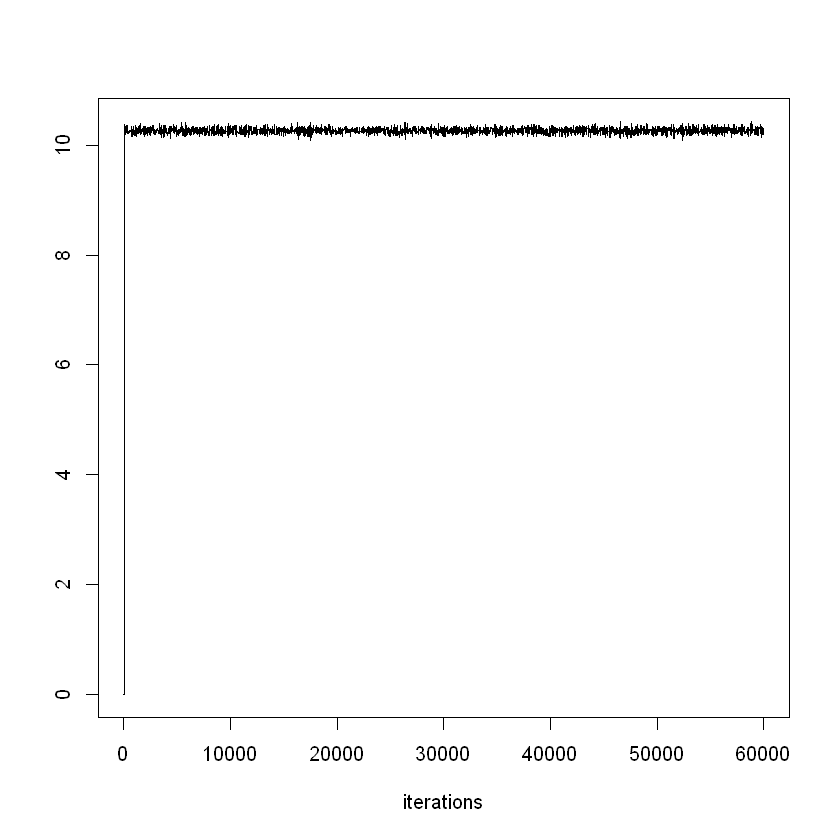

In [21]:
plot(seq(1, niter+1), SA[[1]], 'l', xlab='iterations', ylab='')

***

This is the time series plot of markov chain from data cloning algorithm

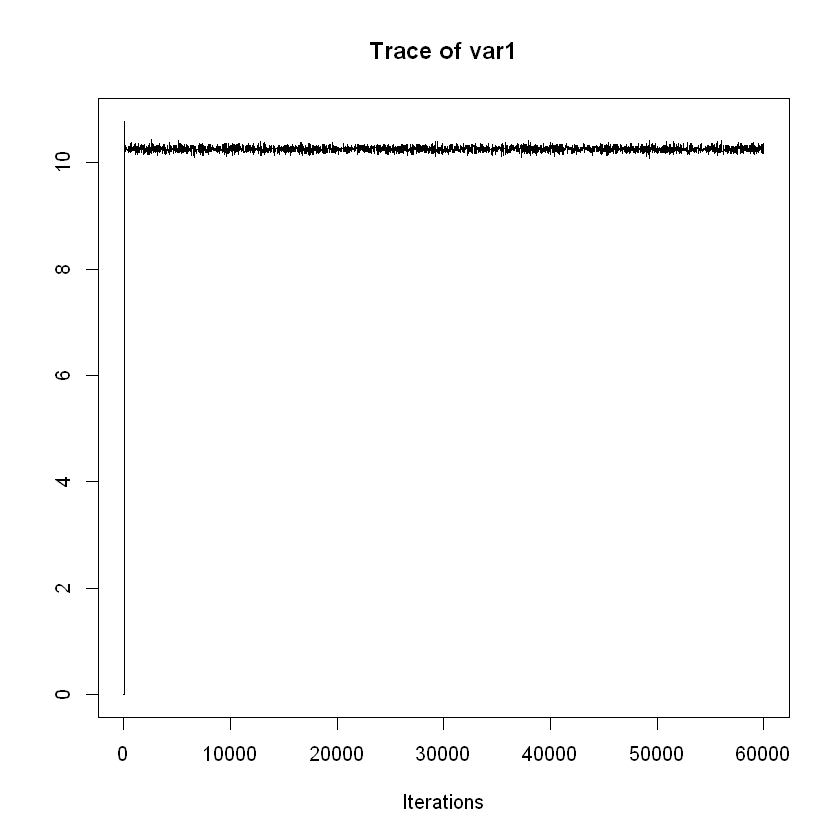

In [20]:
plot(data.cloning, density=FALSE)

A burn-in period of 20000 will be enough for both chains, so let's cut off the first 20000 iterations (I could use the gelman-rubin diagnostic, but I only have one chain for each algorithm here. But I can do this later!)

In [26]:
burn.SA <- SA[[1]][20000:niter]
burn.DC <- data.cloning[20000:niter]

Let's plot them together!

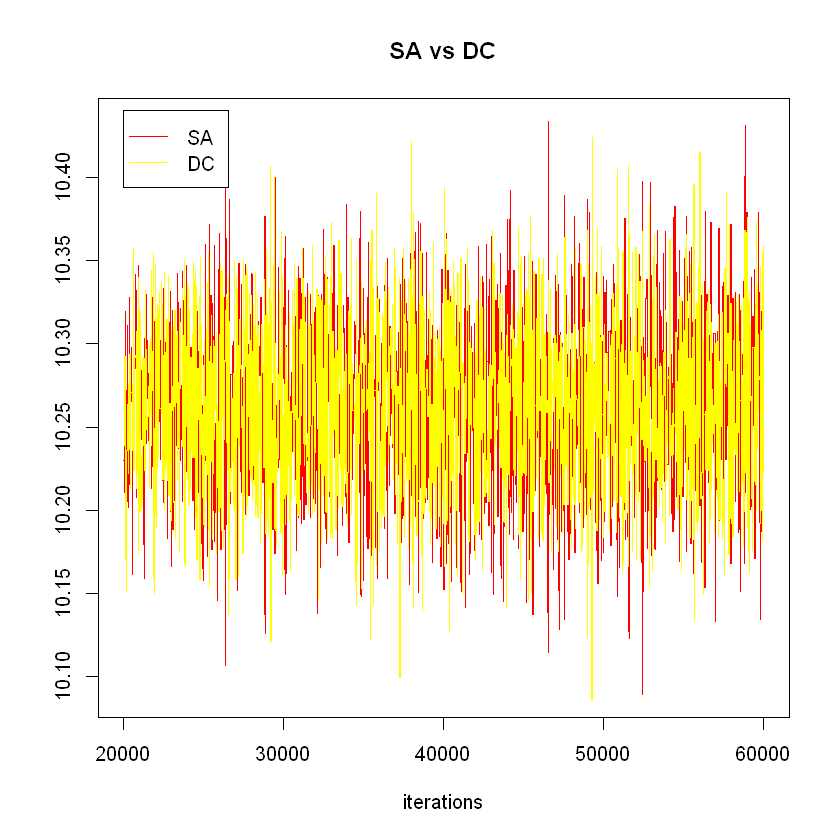

In [42]:
plot(seq(20000, niter), burn.SA, 'l', col='red', xlab='iterations', ylab='', main='SA vs DC')
lines(seq(20000, niter), burn.DC, 'l', col='yellow')
legend(x=20000, y=10.44, legend=c('SA', 'DC'), 
       col=c('red', 'yellow'), 
       pch=c(-1,-1)， 
       lty=c(1,1), 
       lwd=c(1,1))

As you can see, the result is what we expected!

Now let's calculate the mean for each chain, after burn-in

In [44]:
print ('Mean for Simulated Annealing is:')
print (mean(burn.SA))
print ('Mean for Data Cloning is:')
print (mean(burn.DC))

[1] "Mean for Simulated Annealing is:"
[1] 10.26305
[1] "Mean for Data Cloning is:"
[1] 10.26362


Again, they have almost the same mean!